# 종합 통계 실습

## 비즈니스 시나리오

> 여러분은 식품·와인 유통 기업 **FreshCart**의 데이터 분석팀 인턴입니다. \
> 마케팅팀이 6차례 캠페인을 진행했지만 수락률이 낮아 경영진이 우려하고 있습니다. \
> 고객 데이터를 분석하여 **다음 캠페인의 집중 공략 전략**을 수립해 주세요.

---

| Part | 주제 | 핵심 질문 |
|------|------|-----------|
| **Part 0** | 데이터 전처리 | (코드 제공) |
| **Part 1** | 탐색적 데이터 분석 | 고객은 누구인가? |
| **Part 2** | 확률분포 모델링 | 고객 행동은 어떤 패턴을 따르는가? |
| **Part 3** | 추정과 가설검정 | 고소득 고객과 저소득 고객의 소비는 다른가? |
| **Part 4** | 고급 검정 | 교육, 결혼, 캠페인 반응의 관계는? |
| **Part 5** | 상관분석 / 비율 비교 | 변수 간 관계를 파악하고, 캠페인 효과를 검증할 수 있는가? |
| **Challenge** | 종합 분석 보고서 | 다음 캠페인 타겟은 누구인가? |

### 데이터 셋 개요

| 항목 | 내용 |
|------|------|
| **출처** | Kaggle |
| **URL** | https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis |
| **크기** | 약 2,240행 × 29열 |
| **파일명** | `marketing_campaign.csv` |
| **도메인** | 식품·와인 유통 기업 |

**설명:** 고객 성격 분석은 기업의 이상적인 고객을 심층 분석하는 방법론이다. 고객 세그먼트별 니즈·행동·관심사를 파악해 제품 및 마케팅을 최적화하는 데 활용한다.

---

### 변수 목록

#### 고객 정보

| # | 변수명 | 설명 |
|---|--------|------|
| 1 | `ID` | 고객 고유 식별자 |
| 2 | `Year_Birth` | 고객 출생연도 |
| 3 | `Education` | 최종 학력 |
| 4 | `Marital_Status` | 결혼 상태 |
| 5 | `Income` | 연간 가구 소득 |
| 6 | `Kidhome` | 가구 내 어린 자녀 수 |
| 7 | `Teenhome` | 가구 내 십대 자녀 수 |
| 8 | `Dt_Customer` | 고객 등록일 |
| 9 | `Recency` | 마지막 구매 이후 경과 일수 |

---

#### 소비 패턴 — 최근 2년간 지출 금액

| # | 변수명 | 설명 |
|---|--------|------|
| 10 | `MntWines` | 와인 지출 금액 |
| 11 | `MntFruits` | 과일 지출 금액 |
| 12 | `MntMeatProducts` | 육류 지출 금액 |
| 13 | `MntFishProducts` | 생선 지출 금액 |
| 14 | `MntSweetProducts` | 과자·디저트 지출 금액 |
| 15 | `MntGoldProds` | 골드 지출 금액 |

---

#### 캠페인 반응

| # | 변수명 | 설명 |
|---|--------|------|
| 16 | `NumDealsPurchases` | 할인 적용 구매 횟수 |
| 17 | `NumWebPurchases` | 웹사이트를 통한 구매 횟수 |
| 18 | `NumCatalogPurchases` | 카탈로그를 통한 구매 횟수 |
| 19 | `NumStorePurchases` | 오프라인 매장 구매 횟수 |
| 20 | `NumWebVisitsMonth` | 최근 한 달간 웹사이트 방문 횟수 |
| 21 | `AcceptedCmp3` | 3차 캠페인 제안 수락 여부 (1=수락, 0=거절) |
| 22 | `AcceptedCmp4` | 4차 캠페인 제안 수락 여부 |
| 23 | `AcceptedCmp5` | 5차 캠페인 제안 수락 여부 |
| 24 | `AcceptedCmp1` | 1차 캠페인 제안 수락 여부 |
| 25 | `AcceptedCmp2` | 2차 캠페인 제안 수락 여부 |
| 26 | `Complain` | 최근 2년 내 불만 제기 여부 (1=있음, 0=없음) |
| 27 | `Z_CostContact` | 상수값 3 — 캠페인 1회당 연락 비용 |
| 28 | `Z_Revenue` | 상수값 11 — 캠페인 성공 시 수익 |
| 29 | `Response` | 최종 캠페인 제안 수락 여부 **(타깃 변수)** |

In [1]:
print('hi')

hi


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import trim_mean
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.proportion import (
    proportions_ztest, proportion_confint, proportion_effectsize
)
from statsmodels.stats.power import NormalIndPower, TTestIndPower
import pingouin as pg
import warnings
import platform

warnings.filterwarnings('ignore')

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

COLORS = {
    'blue': '#3B82F6', 'indigo': '#6366F1', 'violet': '#8B5CF6',
    'teal': '#14B8A6', 'emerald': '#10B981', 'amber': '#F59E0B',
    'rose': '#F43F5E', 'red': '#EF4444', 'slate': '#64748B',
    'sky': '#0EA5E9', 'purple': '#A855F7', 'lime': '#84CC16',
}

---
## Part 0: 데이터 전처리 (코드 제공)

아래 코드를 실행하여 분석에 사용할 데이터프레임 `df`를 준비합니다.
모든 파생변수가 생성되고 이상치가 제거된 상태에서 Part 1부터 분석을 시작합니다.

### 0-1. 데이터 로드 및 결측치 처리

In [3]:
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
print(f"원본 데이터: {df.shape[0]}행 × {df.shape[1]}열")
print(f"Income 결측치: {df['Income'].isnull().sum()}개")

df['Income'] = df['Income'].fillna(df['Income'].median())
print(f"→ Income 중앙값({df['Income'].median():,.0f})으로 대치 완료")

원본 데이터: 2240행 × 29열
Income 결측치: 24개
→ Income 중앙값(51,382)으로 대치 완료


In [4]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### 0-2. 파생변수 생성

In [5]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

df['Age'] = 2024 - df['Year_Birth']
df['Total_Spending'] = df[spending_cols].sum(axis=1)
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)
df['Total_Accepted'] = df[campaign_cols].sum(axis=1)
df['Has_Children'] = (df['Kidhome'] + df['Teenhome']) > 0
df['Income_Group'] = pd.qcut(df['Income'], 3, labels=['Low', 'Mid', 'High'])

bins = [0, 39, 49, 59, 200]
labels_age = ['30대 이하', '40대', '50대', '60대 이상']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels_age)

edu_map = {'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
           'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'}
df['Education_Group'] = df['Education'].map(edu_map)

marital_map = {'Married': 'Together', 'Together': 'Together',
               'Single': 'Single', 'Divorced': 'Single', 'Widow': 'Single',
               'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'}
df['Marital_Group'] = df['Marital_Status'].map(marital_map)

df['Campaign_Response'] = df['Total_Accepted'] > 0

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
reference_date = df['Dt_Customer'].max()
df['Customer_Days'] = (reference_date - df['Dt_Customer']).dt.days

print("파생변수 생성 완료:")
for col in ['Age', 'Total_Spending', 'Total_Purchases', 'Total_Accepted',
            'Has_Children', 'Income_Group', 'Age_Group', 'Education_Group',
            'Marital_Group', 'Campaign_Response', 'Customer_Days']:
    print(f"  - {col}: {df[col].dtype}")

파생변수 생성 완료:
  - Age: int64
  - Total_Spending: int64
  - Total_Purchases: int64
  - Total_Accepted: int64
  - Has_Children: bool
  - Income_Group: category
  - Age_Group: category
  - Education_Group: str
  - Marital_Group: str
  - Campaign_Response: bool
  - Customer_Days: int64


### 0-3. 이상치 제거

In [6]:
n_before = len(df)
df = df[(df['Age'] <= 100) & (df['Income'] <= 200000)].copy()
n_after = len(df)
print(f"이상치 제거: {n_before}행 → {n_after}행 ({n_before - n_after}행 제거)")
print(f"\n최종 데이터 요약:")
print(f"  Age 범위: {df['Age'].min()} ~ {df['Age'].max()}")
print(f"  Income 범위: {df['Income'].min():,.0f} ~ {df['Income'].max():,.0f}")
print(f"\n데이터 준비가 완료되었습니다. Part 1부터 분석을 시작하세요!")

이상치 제거: 2240행 → 2236행 (4행 제거)

최종 데이터 요약:
  Age 범위: 28 ~ 84
  Income 범위: 1,730 ~ 162,397

데이터 준비가 완료되었습니다. Part 1부터 분석을 시작하세요!


---
## Part 1: 탐색적 데이터 분석 — "고객은 누구인가?"

기술통계량과 시각화를 통해 FreshCart 고객의 특성을 파악합니다.

### 문제 1-1. 중심경향과 산포도

`Income`, `Total_Spending`, `Age` 세 변수에 대해 다음을 계산하세요.

| 중심경향 | 산포도 |
|----------|--------|
| 평균(mean) | 분산(variance) |
| 중앙값(median) | 표준편차(std) |
| 최빈값(mode) | 사분위범위(IQR) |
| 5% 절사평균(trimmed mean) | 변동계수(CV) |

In [7]:
# TODO 1-1(a): Income, Total_Spending, Age의 중심경향 — 평균, 중앙값, 최빈값, 5% 절사평균
df2 = df[['Income', 'Total_Spending', 'Age']].copy()

# 평균
print(df2.mean())

# 중앙값
print(df2.median())

# 최빈값
print(df2.mode())

# 5% 절사평균
print(stats.trim_mean(df2, 0.05))

Income            51952.614043
Total_Spending      605.986583
Age                  55.101968
dtype: float64
Income            51381.5
Total_Spending      396.5
Age                  54.0
dtype: float64
    Income  Total_Spending  Age
0  51381.5              46   48
[51740.15342602   561.11966236    55.07497517]


In [8]:
# TODO 1-1(b): Income, Total_Spending, Age의 산포도 — 분산(ddof=1), 표준편차, IQR, CV(%)

# 분산
print(df2.var(ddof = 1))

# 표준편차
print(df2.std(ddof = 1))

# IQR
income = df2['Income']
total_spending = df2['Total_Spending']
age = df2['Age']

income_Q1 = income.quantile(0.25)
income_Q3 = income.quantile(0.75)
total_spending_Q1 = total_spending.quantile(0.25)
total_spending_Q3 = total_spending.quantile(0.75)
age_Q1 = age.quantile(0.25)
age_Q3 = age.quantile(0.75)

income_IQR = income_Q3 - income_Q1
total_spending_IQR = total_spending_Q3 - total_spending_Q1
age_IQR = age_Q3 - age_Q1

print(f'income_IQR : {income_IQR}')
print(f'total_spending_IQR : {total_spending_IQR}')
print(f'age_IQR : {age_IQR}')

# CV(%)
def cv(data):
    """변동계수(%) 계산"""
    return (data.std() / data.mean()) * 100

print(cv(income))
print(cv(total_spending))
print(cv(age))

Income            4.584509e+08
Total_Spending    3.622417e+05
Age               1.369668e+02
dtype: float64
Income            21411.466851
Total_Spending      601.865156
Age                  11.703281
dtype: float64
income_IQR : 32773.25
total_spending_IQR : 976.5
age_IQR : 18.0
41.21345430831326
99.31988145087065
21.239315339398477


### 문제 1-2. 분포 시각화

- **(a)** Income 히스토그램 + KDE + 평균/중앙값 수직선
- **(b)** Total_Spending 수평 박스플롯 + IQR 기준 이상치 개수 출력
- **(c)** Income_Group별 Total_Spending 바이올린 플롯

Text(0.5, 1.0, 'Income KDE')

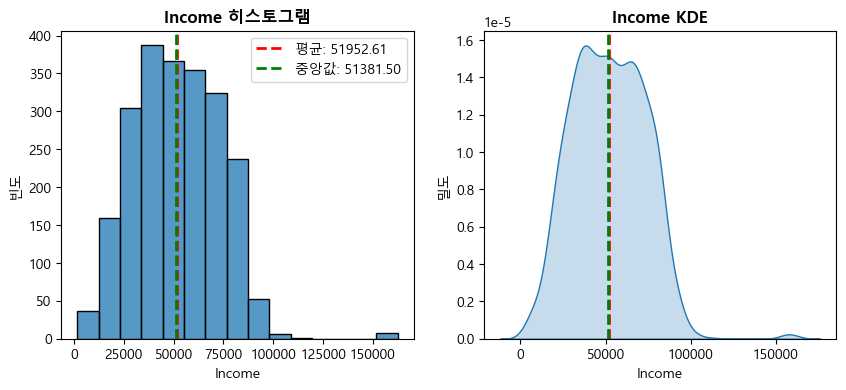

In [9]:
# TODO 1-2(a): Income 히스토그램 + KDE

fig, axes = plt.subplots(1,2, figsize = (10, 4))

sns.histplot(income, bins = 15, kde = False, ax = axes[0])
axes[0].axvline(income.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {income.mean():.2f}')
axes[0].axvline(income.median(), color='green', linestyle='--', linewidth=2, label=f'중앙값: {income.median():.2f}')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('빈도')
axes[0].set_title('Income 히스토그램', fontweight='bold')
axes[0].legend()

sns.kdeplot(income, fill = True, ax = axes[1])
axes[1].axvline(income.mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {income.mean():.2f}')
axes[1].axvline(income.median(), color='green', linestyle='--', linewidth=2, label=f'중앙값: {income.median():.2f}')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('밀도')
axes[1].set_title('Income KDE', fontweight='bold')

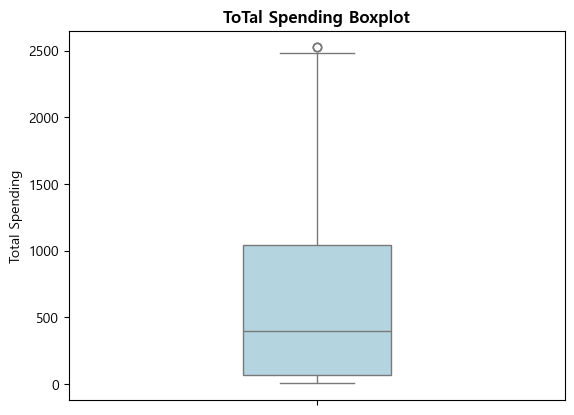

69.0


0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Total_Spending, dtype: int64

In [10]:
# TODO 1-2(b): Total_Spending 박스플롯 + IQR 기준 이상치

sns.boxplot(y= total_spending, color = 'lightblue', width = 0.3)
plt.ylabel('Total Spending')
plt.title('ToTal Spending Boxplot', fontweight='bold')
plt.show()

print(total_spending_Q1)
iqr_lower = total_spending_Q1 - 1.5 * total_spending_IQR
iqr_upper = total_spending_Q3 - 1.5 * total_spending_IQR
iqr_outliers = total_spending[(total_spending < iqr_lower)|(total_spending > iqr_upper)]    
iqr_outliers.head(10)

In [11]:
df['Income_Group'].value_counts()

Income_Group
Low     746
Mid     745
High    745
Name: count, dtype: int64

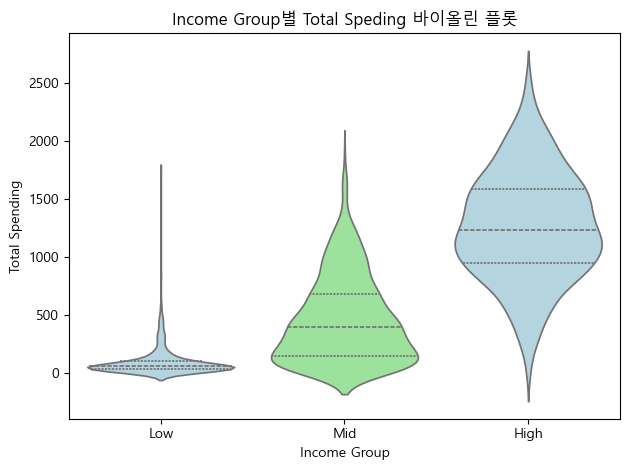

In [12]:
# TODO 1-2(c): Income_Group별 Total_Spending 바이올린 플롯

sns.violinplot(data = df, x ='Income_Group', y = 'Total_Spending',
               palette = ['lightblue', 'lightgreen'], inner = 'quartile')
plt.xlabel('Income Group')
plt.ylabel('Total Spending')
plt.title('Income Group별 Total Speding 바이올린 플롯')
plt.tight_layout()
plt.show()

### 문제 1-3. 왜도와 첨도

6개 소비 카테고리(MntWines ~ MntGoldProds)의 왜도(Skewness)와 첨도(Kurtosis)를 계산하고,
2×3 히스토그램 그리드를 그려 분포 형태를 비교하세요.

**왜도 해석**
- 왜도 > 0: 오른쪽 꼬리가 긴 분포 
- 왜도 < 0: 왼쪽 꼬리가 긴 분포 
- 왜도 ≈ 0: 좌우 대칭에 가까운 분포

**첨도 해석** 
- 초과 첨도 > 0: 정규분포보다 중앙이 뾰족하고 꼬리가 두꺼운 분포 
- 초과 첨도 < 0: 정규분포보다 중앙이 평평하고 꼬리가 얇은 분포
- 초과 첨도 ≈ 0: 정규분포와 유사한 형태

In [13]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Total_Spending,Total_Purchases,Total_Accepted,Has_Children,Income_Group,Age_Group,Education_Group,Marital_Group,Campaign_Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1617,22,1,False,Mid,60대 이상,Graduate,Single,True,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,27,4,0,True,Mid,60대 이상,Graduate,Single,False,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,776,20,0,False,High,50대,Graduate,Together,False,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,53,6,0,True,Low,40대,Graduate,Together,False,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,422,14,0,True,Mid,40대,Postgraduate,Together,False,161
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,716,20,0,True,Mid,50대,Postgraduate,Together,False,293
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,590,17,0,True,Mid,50대,Graduate,Single,False,593
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,169,8,0,True,Low,30대 이하,Postgraduate,Together,False,417
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,46,5,1,True,Low,50대,Postgraduate,Together,True,388
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,49,1,1,True,Low,60대 이상,Postgraduate,Together,True,108


In [14]:
spending_names = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
hist_colors = [COLORS['blue'], COLORS['violet'], COLORS['teal'],
               COLORS['emerald'], COLORS['amber'], COLORS['rose']]

# TODO 1-3(a): 6개 카테고리의 왜도/첨도 계산 및 출력
for col in spending_names:
    print(f'{col}: 왜도 = {df[col].skew():.2f}, 첨도 = {df[col].kurt()}')

MntWines: 왜도 = 1.18, 첨도 = 0.6005314639884163
MntFruits: 왜도 = 2.10, 첨도 = 4.06975425085383
MntMeatProducts: 왜도 = 2.09, 첨도 = 5.530135658905085
MntFishProducts: 왜도 = 1.92, 첨도 = 3.09602040234761
MntSweetProducts: 왜도 = 2.14, 첨도 = 4.372061860782441
MntGoldProds: 왜도 = 1.89, 첨도 = 3.5583489498611462


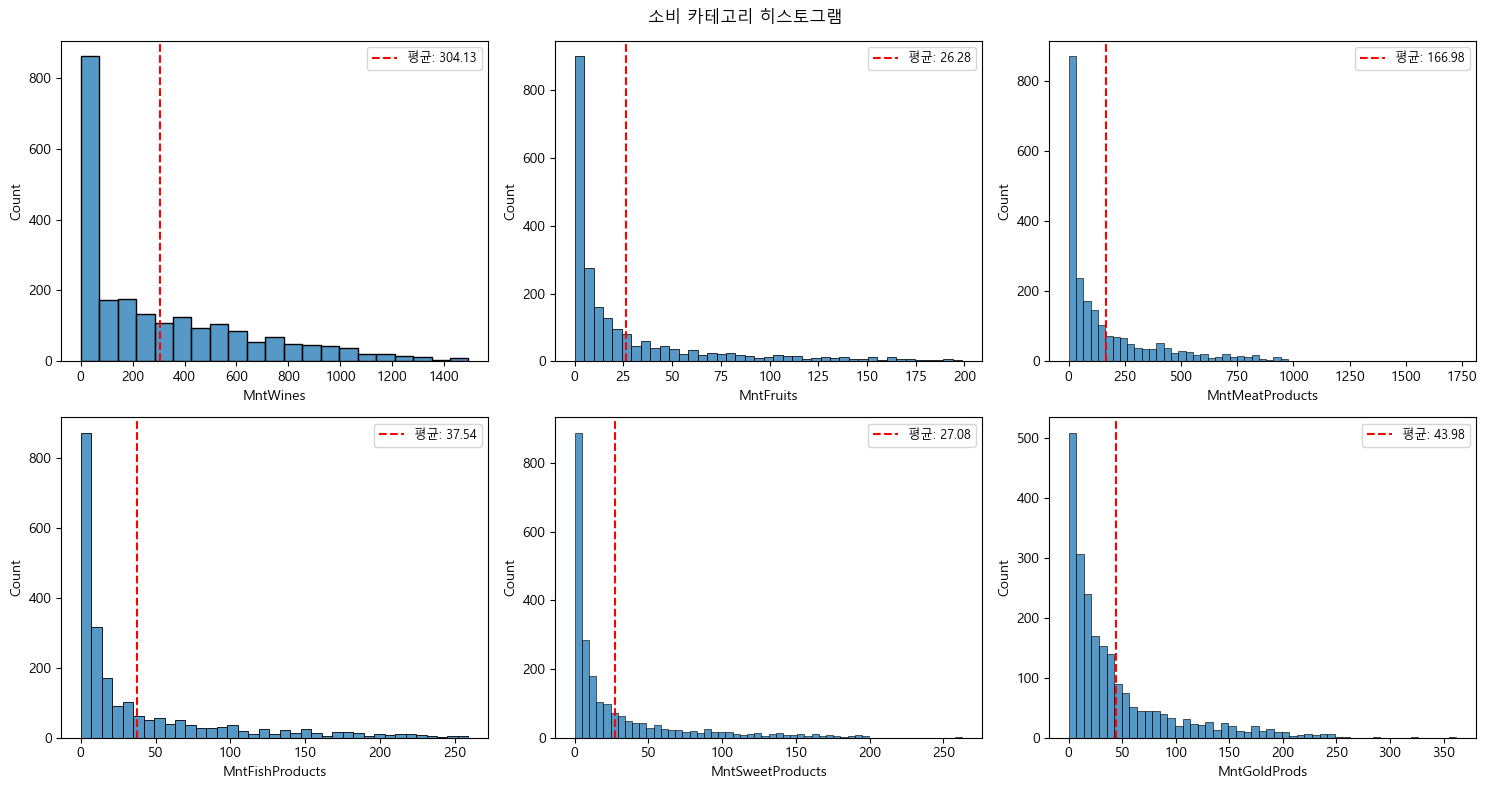

In [15]:
# TODO 1-3(b): 2×3 히스토그램 그리드 (각 카테고리 분포 + 평균선)
fig, axes = plt.subplots(2,3, figsize = (15, 8))

sns.histplot(df['MntWines'], bins = 'auto', ax = axes[0,0])
axes[0, 0].axvline(df['MntWines'].mean(), color='red', linestyle='--', label=f'평균: {df['MntWines'].mean():.2f}')
axes[0, 0].legend(fontsize = 9)

sns.histplot(df['MntFruits'], bins = 'auto', ax  = axes[0,1])
axes[0, 1].axvline(df['MntFruits'].mean(), color='red', linestyle='--', label=f'평균: {df['MntFruits'].mean():.2f}')
axes[0, 1].legend(fontsize = 9)

sns.histplot(df['MntMeatProducts'], bins = 'auto', ax  = axes[0,2])
axes[0, 2].axvline(df['MntMeatProducts'].mean(), color='red', linestyle='--', label=f'평균: {df['MntMeatProducts'].mean():.2f}')
axes[0, 2].legend(fontsize = 9)


sns.histplot(df['MntFishProducts'], bins = 'auto', ax  = axes[1,0])
axes[1, 0].axvline(df['MntFishProducts'].mean(), color='red', linestyle='--', label=f'평균: {df['MntFishProducts'].mean():.2f}')
axes[1, 0].legend(fontsize = 9)


sns.histplot(df['MntSweetProducts'], bins = 'auto', ax  = axes[1,1])
axes[1, 1].axvline(df['MntSweetProducts'].mean(), color='red', linestyle='--', label=f'평균: {df['MntSweetProducts'].mean():.2f}')
axes[1, 1].legend(fontsize = 9)


sns.histplot(df['MntGoldProds'], bins = 'auto', ax  = axes[1,2])
axes[1, 2].axvline(df['MntGoldProds'].mean(), color='red', linestyle='--', label=f'평균: {df['MntGoldProds'].mean():.2f}')
axes[1, 2].legend(fontsize = 9)


plt.suptitle('소비 카테고리 히스토그램')
plt.tight_layout()
plt.show()

### 문제 1-4. 비즈니스 인사이트 정리

Part 1의 분석 결과를 바탕으로 다음을 정리하세요.

1. 고객 특성 요약 (연령, 소득, 소비 특성)
2. 핵심 발견 사항 (분포 특성, 그룹 간 차이)
3. 후속 분석에서 검증할 가설 (최소 3개)

In [16]:
# TODO 1-4: 비즈니스 인사이트 정리
print('1. 고객은 40대 후반 50대 사이에 분포해있고, 소득은 평균 5만이고 소비는 평균 500정도 한다.')

print('2. 고객 소득은 5만 달러 부근에 대부분 분포해 있고, 소득이 증가할수록 지출이 커지는 경향성이 있다.')

print('3. - 고소득층일수록 와인 소비를 많이 하는지? \n   - 와인과 고기를 같이 구매하는 비중이 높은지? \n   - 총지출이 높은 사람들이 고소득층인지?')

1. 고객은 40대 후반 50대 사이에 분포해있고, 소득은 평균 5만이고 소비는 평균 500정도 한다.
2. 고객 소득은 5만 달러 부근에 대부분 분포해 있고, 소득이 증가할수록 지출이 커지는 경향성이 있다.
3. - 고소득층일수록 와인 소비를 많이 하는지? 
   - 와인과 고기를 같이 구매하는 비중이 높은지? 
   - 총지출이 높은 사람들이 고소득층인지?


---
## Part 2: 확률분포 모델링 — "고객 행동은 어떤 패턴을 따르는가?"

실제 고객 데이터에 이론적 확률분포를 적합하여 고객 행동을 모델링합니다.

### 문제 2-1. 이항분포 — 캠페인 수락 모델링

`Response` 열에서 수락률 p를 계산하고, 이를 이항분포 B(n, p)에 적용합니다.

- **(a)** 10명 중 정확히 2명이 수락할 확률
  - B(n=10, p) 에서 P(X = 2) 계산

- **(b)** 10명 중 3명 이상이 수락할 확률
  - B(n=10, p) 에서 P(X ≥ 3) 계산

- **(c)** 이항분포 PMF 시각화
  - B(n=10, p) 의 모든 경우(X = 0, 1, ..., 10)에 대한
    이론 확률을 막대그래프로 그립니다.

- **(d)** n=100 으로 확장 — 세 가지 질문
  - **기대 수락자 수**: E(X) 계산
  - **15명 이상 수락 확률**: P(X ≥ 15) 계산
  - **90% 보장 최소 수락 수**: P(X ≤ k) ≥ 0.90 을 만족하는 최솟값 k 탐색

In [17]:
# TODO 2-1(a),(b): 수락률(p) 계산 + P(X=2), P(X≥3) 계산 및 출력
df['Response'].value_counts() # 1: 334 전체 행 : 2236 -> 0.15(15%)

n_trial = 10
p_rate = 0.15

binom_dist = stats.binom(n=n_trial, p = p_rate)

print(f'P(x=2) :', binom_dist.pmf(2))

print('p(x>=3) :', binom_dist.sf(2))

P(x=2) : 0.2758966566020505
p(x>=3) : 0.1798035196324219


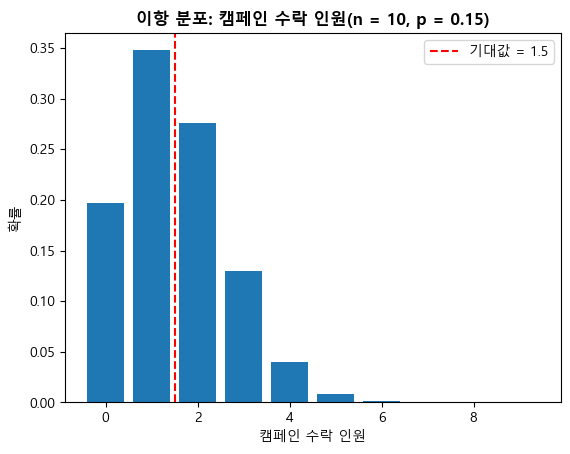

In [20]:
# TODO 2-1(c): 이항분포 PMF 시각화
k = np.arange(0, 10)
pmf = binom_dist.pmf(k)
plt.figure()
plt.bar(k, pmf)
plt.axvline(n_trial * p_rate, color='red', linestyle='--',
                label=f'기대값 = {n_trial * p_rate:.1f}')
plt.xlabel('캠페인 수락 인원')
plt.ylabel('확률')
plt.title('이항 분포: 캠페인 수락 인원(n = 10, p = 0.15)', fontweight = 'bold')
plt.legend()
plt.show()

In [22]:
# TODO 2-1(d): 100명 발송 시 기대 수락자, P(X≥15), 90% 보장 최소 수락 수
n_campaign = 100
p_rate = 0.15

binom_dist2 = stats.binom(n = n_campaign, p = p_rate)
print('P(x>=15) :', binom_dist2.sf(14))
print('90% 보장 최소 수락 수 :', binom_dist2.ppf(0.9))

P(x>=15) : 0.5427757942240515
90% 보장 최소 수락 수 : 20.0


### 문제 2-2. 포아송 분포 — 웹사이트 방문 모델링

`NumWebVisitsMonth`(월간 웹 방문 수)에 포아송 분포를 적합합니다.

- **(a)** λ 추정 및 적합 평가
  - 표본 평균으로 λ를 추정하고,
    표본 평균 ≈ 표본 분산인지 확인하여 포아송 분포 적합 여부를 평가합니다.

- **(b)** 실측 vs 이론 PMF 시각화
  - 각 방문 횟수(0회, 1회, 2회, ...)별 실제 비율(실측 PMF)과
    포아송 분포의 이론 확률(이론 PMF)을 막대그래프로 겹쳐 그려 비교합니다.

- **(c)** 포아송 분포 활용 — 두 가지 실무 시나리오
  - **과다 방문 고객 비율**: P(X ≥ 10) 계산
    → 추정된 포아송 분포에서 월 10회 이상 방문할 확률이 몇 %인지 구합니다.
  - **서버 용량 계획**: 상위 5% 기준값 k 계산, 즉 P(X ≤ k) = 0.95 를 만족하는 k 탐색
    → 전체 고객의 95%를 커버할 수 있는 최대 방문 횟수를 구하고,
       이를 서버가 처리해야 할 기준 용량으로 활용합니다.

In [ ]:
web_visits = df['NumWebVisitsMonth']
avg = web_visits.mean()
print(avg)

# TODO 2-2(a): 람다 추정 및 포아송 적합 평가 (월간 웹 방문수 평균≈분산 값이 비슷한지 확인)
poisson_dist = stats.poisson(mu = avg)
print(poisson_dist.mean())
print(poisson_dist.var()) #  포아송 적합

5.318872987477639
5.318872987477639
5.318872987477639


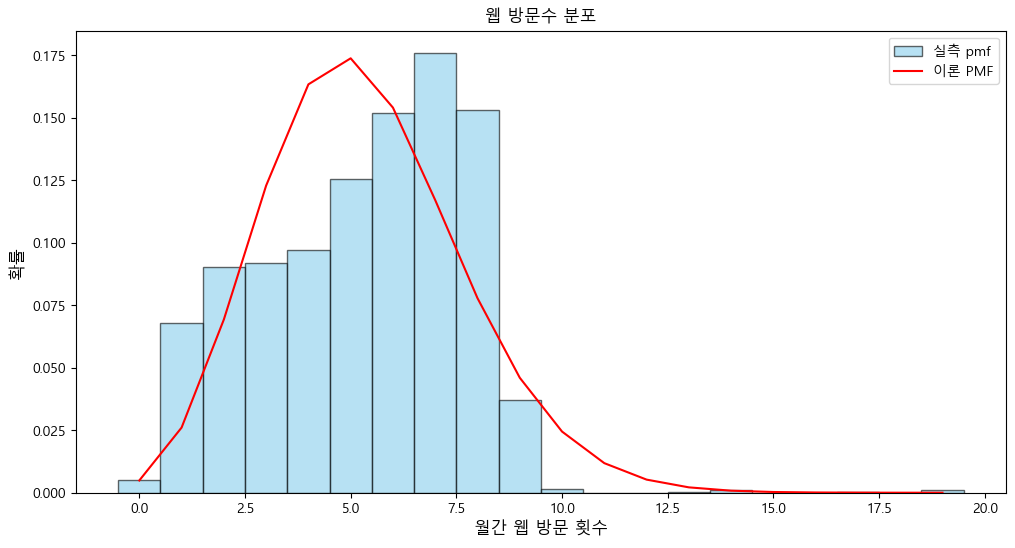

In [40]:
# TODO 2-2(b): 월간 웹 방문수 막대그래프 vs 이론 PMF 비교 시각화 (두 그래프를 겹쳐서 그리기)
k = np.arange(0, 20)
pmf = poisson_dist.pmf(k)

plt.figure(figsize = (12, 6))
plt.hist(web_visits, bins=np.arange(-0.5, 20.5, 1), density = True, alpha = 0.6, color = 'skyblue', edgecolor = 'black', label = '실측 pmf')

plt.plot(k, pmf, 'r-', linewidth=1.5,
         label='이론 PMF', zorder=5)

plt.xlabel('월간 웹 방문 횟수', fontsize= 12)
plt.ylabel('확률', fontsize = 12)
plt.title('웹 방문수 분포')
plt.legend()
plt.show()

In [41]:
# TODO 2-2(c):
# - 과다 방문 고객: 포아송 분포로 P(X ≥ 10) 계산 (월 10회 이상 방문 확률)
# - 서버 용량 계획: P(X ≤ k) ≥ 0.95 를 만족하는 최솟값 k 탐색 (상위 5% 기준)
heavy_threshold = 10

print(poisson_dist.sf(9))
print(poisson_dist.ppf(0.95))

0.04491858697430207
9.0


### 문제 2-3. 정규분포 — 소득 모델링

`Income`에 정규분포를 적합합니다.
Part 1에서 Income의 왜도가 작고 평균≈중앙값임을 확인했습니다. 정규분포가 잘 맞을까요?

- **(a)** μ, σ 추정 후 CDF로 P(Income < 30000), P(Income > 80000) 계산,
 PPF로 상위 10% 소득 기준값 계산 — **이론 확률과 실측 비율을 비교**하세요
- **(b)** 히스토그램 + 정규 분포 PDF와 겹쳐 그리기
- **(c)** 정규분포 활용 — 두 가지 질문
  - **VIP 기준선**: 상위 5% 소득 기준값
    → "이 금액 이상이면 VIP 고객으로 분류"
  - **할인 대상 기준선**: 하위 10% 소득 기준값
    → "이 금액 이하이면 할인 대상 고객으로 분류"


In [49]:
# TODO 2-3(a): μ, σ 추정 → CDF로 P(Income<30000), P(Income>80000) 계산
#               PPF로 상위 10% 소득 기준값 계산 → 이론 확률과 실측 비율 비교
mu = df['Income'].mean()
sigma = df['Income'].std()

norm_dist = stats.norm(loc = mu, scale = sigma)

print(f'P(Income < 30000) & P(Income > 80000) : {(norm_dist.cdf(80000) - norm_dist.cdf(30000)):.4f}')
print(f'상위 10%: {norm_dist.ppf(0.9):.2f}')

P(Income < 30000) & P(Income > 80000) : 0.7523
상위 10%: 79392.51


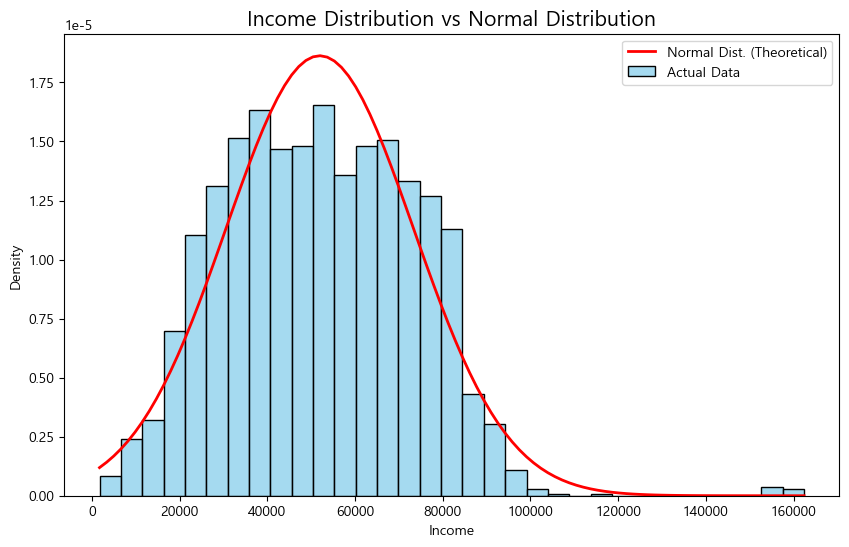

In [52]:
# TODO 2-3(b): 히스토그램 + 정규 PDF 겹쳐 그리기

x = np.linspace(df['Income'].min(), df['Income'].max(), 100)
pdf = norm_dist.pdf(x)

plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=False, stat="density", color="skyblue", label="Actual Data")

pdf_values = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf_values, color="red", linewidth=2, label="Normal Dist. (Theoretical)")

plt.title('Income Distribution vs Normal Distribution', fontsize=15)
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.show()

In [53]:
# TODO 2-3(c): 실무 시나리오 — VIP(상위 5%) 기준선 + 할인 대상(하위 10%) 기준선

top_5_height = norm_dist.ppf(0.95)
print(top_5_height)

low_10_height = norm_dist.ppf(0.1)
print(low_10_height)

87171.34295042677
24512.715179993782


---
## Part 3: 추정과 가설검정 — "고소득 고객과 저소득 고객의 소비는 다른가?"

신뢰구간과 가설검정을 통해 고객 그룹 간 차이를 통계적으로 검증합니다.

### 문제 3-1. 신뢰구간 추정

- **(a)** Total_Spending 평균의 90%, 95%, 99% 신뢰구간을 계산하세요.
- **(b)** Income_Group별 95% CI를 계산하고 오차막대 그래프로 비교하세요.

CI = [x̄ - t × SE, x̄ + t × SE] (SE = s / √n)

In [56]:
# TODO 3-1(a): Total_Spending 평균의 신뢰구간 (90%, 95%, 99%)
# CI = x̄ ± t(α/2, n-1) × SE

xbar = df['Total_Spending'].mean()
se = df['Total_Spending'].std()
n = df['Total_Spending'].shape[0]


ci_90 = stats.t.interval(0.90, df = n-1, loc = xbar, scale = se)
ci_95 = stats.t.interval(0.95, df = n-1, loc = xbar, scale = se)
ci_99 = stats.t.interval(0.99, df = n-1, loc = xbar, scale = se)

print(f"신뢰수준 {0.90} CI: [{ci_90[0]:.2f}, {ci_90[1]:.2f}]")
print(f"신뢰수준 {0.95} CI: [{ci_95[0]:.2f}, {ci_95[1]:.2f}]")
print(f"신뢰수준 {0.99} CI: [{ci_99[0]:.2f}, {ci_99[1]:.2f}]")


신뢰수준 0.9 CI: [-384.40, 1596.38]
신뢰수준 0.95 CI: [-574.29, 1786.26]
신뢰수준 0.99 CI: [-945.64, 2157.61]


                 CI_Lower     CI_Upper
Income_Group                          
Low             86.734180   104.619707
Mid            431.472284   484.388119
High          1231.350475  1298.724693


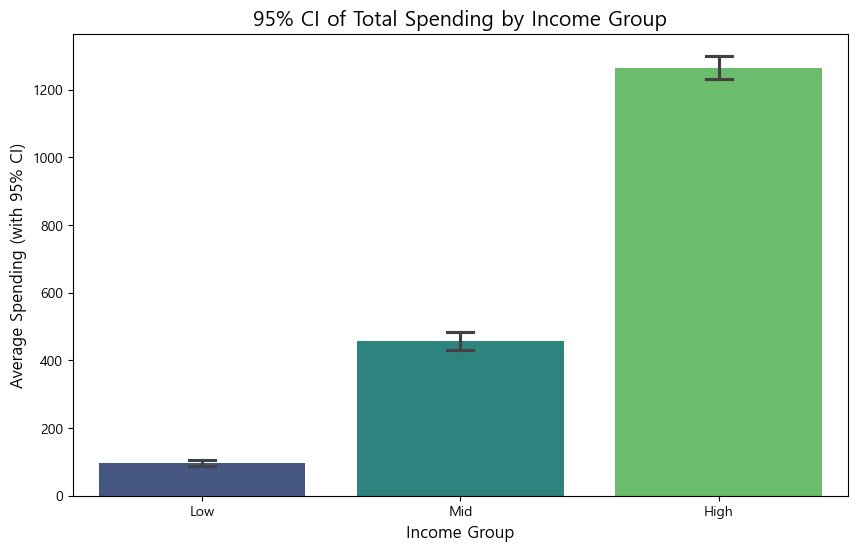

In [68]:
# TODO 3-1(b): Income_Group별 95% CI 계산 + 오차막대 그래프

plt.figure(figsize=(10, 6))

def get_ci95(data):
    # 1. 데이터 개수, 평균, 표준오차 계산
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data) # 표준오차(Standard Error) 계산
    
    # 2. t-분포를 이용한 95% 신뢰구간 계산
    # stats.t.interval(신뢰수준, 자유도, 위치(평균), 규모(표준오차))
    ci_lower, ci_upper = stats.t.interval(0.95, n-1, loc=mean, scale=std_err)
    
    return pd.Series({
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper,
    })

# 3. Income_Group별로 적용
ci_result = df.groupby('Income_Group')['Total_Spending'].apply(get_ci95).unstack()

# 4. 순서 정렬 (원하는 경우)
ci_result = ci_result.reindex(['Low', 'Mid', 'High'])

print(ci_result)
# 2. 오차막대 그래프 생성 (Bar Plot 사용)
# errorbar=('ci', 95)는 95% 신뢰구간을 의미하며 기본값이므로 생략 가능합니다.
# capsize는 오차막대 위아래에 가로선을 추가하여 가독성을 높입니다.
sns.barplot(data=df, x='Income_Group', y='Total_Spending', 
            order=['Low', 'Mid', 'High'],  # 그룹 순서 명시
            errorbar=('ci', 95), capsize=0.1, palette='viridis')

# 3. 그래프 제목 및 라벨 설정
plt.title('95% CI of Total Spending by Income Group', fontsize=15)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Average Spending (with 95% CI)', fontsize=12)

# 4. 출력
plt.show()


### 문제 3-2. 독립표본 t-검정 (Welch's t-test)

**가설**: 자녀가 없는 고객의 총 소비가 자녀가 있는 고객과 다른가?

- H₀: μ_무자녀 = μ_유자녀
- H₁: μ_무자녀 ≠ μ_유자녀

Cohen's d 해석 기준: |d| < 0.5 작은, 0.5~0.8 중간, > 0.8 큰 효과

In [71]:
no_child = df[~df['Has_Children']]['Total_Spending']
yes_child = df[df['Has_Children']]['Total_Spending']

# TODO 3-2: Welch's t-검정 수행 + Cohen's d 계산 + 결과 출력

t_stat, p_value = stats.ttest_ind(no_child, yes_child, equal_var = False)

print(p_value)

def cohens_d_ind(group1, group2):
    """Cohen's d — 독립표본: d = |x̄₁ - x̄₂| / s_pooled"""
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    s_pooled = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return abs(np.mean(group1) - np.mean(group2)) / s_pooled

d_one = cohens_d_ind(no_child, yes_child)
print(d_one)

print('결과해석: 대립가설 채택하고, 무자녀와 유자녀의 총 소비의 효과가 매우 크다는 걸 알 수 있다')

6.321230429385628e-105
1.3598537468445944
결과해석: 대립가설 채택하고, 무자녀와 유자녀의 총 소비의 효과가 매우 크다는 걸 알 수 있다


Text(0, 0.5, '총 소비 금액')

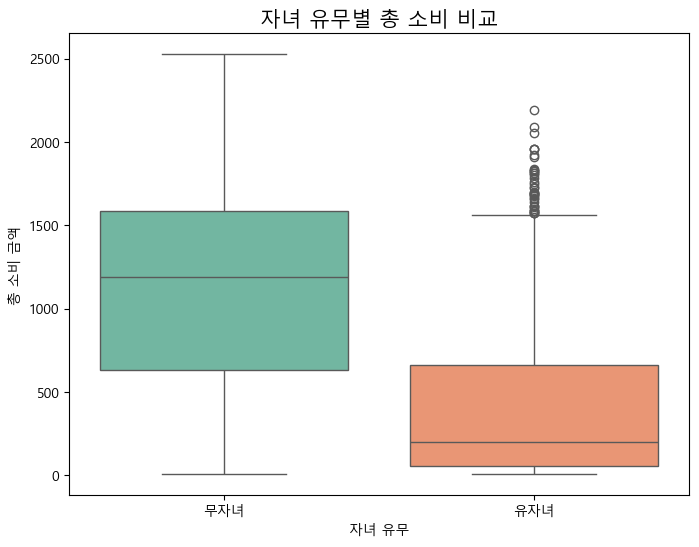

In [74]:
# TODO 3-2(c): 박스플롯 비교 시각화

date_box = pd.DataFrame({'무자녀':pd.Series(no_child), '유자녀': pd.Series(yes_child)})

plt.figure(figsize =(8, 6))
sns.boxplot(data = date_box, palette = 'Set2')

plt.title('자녀 유무별 총 소비 비교', fontsize = 15)
plt.xlabel('자녀 유무')
plt.ylabel('총 소비 금액')

### 문제 3-3. 대응표본 t-검정

같은 고객의 **와인 소비**(`MntWines`)와 **육류 소비**(`MntMeatProducts`)를 비교합니다.

- H₀: μ_Wine = μ_Meat (차이 = 0)
- H₁: μ_Wine ≠ μ_Meat

In [79]:
wines = df['MntWines']
meat = df['MntMeatProducts']

# TODO 3-3: 차이 계산 + 대응표본 t-검정 + Cohen's d + 결과 출력
diff = wines - meat
print(diff.mean())
print(diff.std())

t_stat, p_value = stats.ttest_rel(wines, meat)

p_value  = p_value /2 if t_stat < 0 else 1- p_value /2
print(t_stat, p_value)

def cohens_d_paired(before, after):
    """Cohen's d — 대응표본: d = |x̄_diff| / s_diff"""
    diff = after - before
    return abs(np.mean(diff)) / np.std(diff, ddof=1)

d_paired = cohens_d_paired(wines, meat)
print(d_paired)

# 와인과 육류 소비 차이가 없고, 효과크기도 작다.

137.14400715563505
280.8241527290985
23.092889483443262 1.0
0.488362577872471


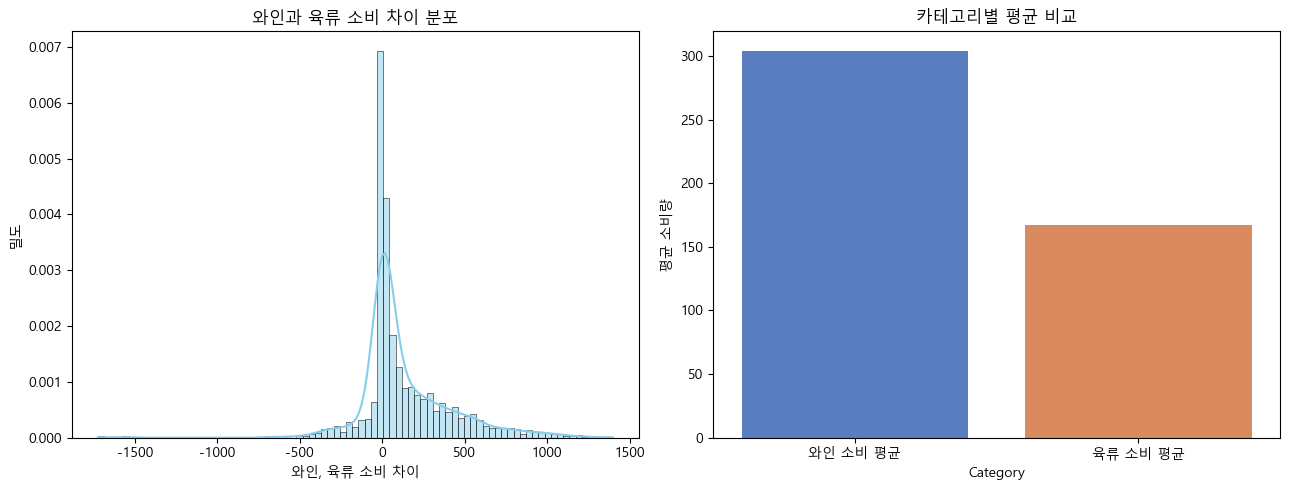

In [84]:
# TODO 3-3(b): (1) 대응 차이 히스토그램 (2) 카테고리별 평균 비교 막대그래프

fig, axes = plt.subplots(1,2 , figsize = (13, 5))
sns.histplot(diff, kde=True, stat="density", color="skyblue", ax=axes[0])
axes[0].set_title("와인과 육류 소비 차이 분포")
axes[0].set_xlabel('와인, 육류 소비 차이')
axes[0].set_ylabel('밀도')

data = pd.DataFrame({
    'Category': ['와인 소비 평균', '육류 소비 평균'],
    'Mean': [wines.mean(), meat.mean()]
})

sns.barplot(data=data, x='Category', y='Mean', ax=axes[1], palette='muted')
axes[1].set_title("카테고리별 평균 비교")
axes[1].set_ylabel("평균 소비량")

plt.tight_layout()
plt.show()


### 문제 3-4. 검정력 분석

- **(a)** 문제 3-2의 효과 크기와 표본 크기를 사용하여 검정력(Power)을 계산하세요.
- **(b)** 작은 효과(d=0.2)를 탐지하기 위해 필요한 그룹당 표본 크기를 구하세요.

In [ ]:
power_analysis = TTestIndPower()

# TODO 3-4(a): 문제 3-2 기준 검정력 계산
# TODO 3-4(b): 작은 효과(d=0.2) 탐지에 필요한 표본 크기 산정



# power = stats.c.cdf()
# power_lib = power_analysis.solve_power(
#     effect_size = d_one,
#     nobs = len(df),
#     alpha = 0.5,
#     alternative = 'two-sided'
# )

# print()

---
## Part 4: 고급 검정 — "교육, 결혼, 캠페인 반응의 관계는?"

정규성 검정을 바탕으로 적절한 검정 방법을 선택하고,
범주형 변수 간 관계를 분석합니다.

### 문제 4-1. 정규성 + 등분산 검정

Education_Group별 Total_Spending의 정규성을 Shapiro-Wilk 검정과 Q-Q Plot으로 확인하세요.
정규성이 기각되더라도, 표본이 충분히 크면(n ≥ 30) 중심극한정리(CLT)에 의해
ANOVA가 여전히 강건(robust)합니다. 각 그룹의 표본 크기도 함께 확인하세요.

⚠️ **등분산성 위반은 CLT와 무관합니다** — 표본이 아무리 커도 해결되지 않습니다.
Levene 검정으로 등분산 가정을 확인하고, 위반 시 Welch's ANOVA를 사용합니다.

In [ ]:
edu_groups = ['Undergraduate', 'Graduate', 'Postgraduate']

# TODO 4-1(a): Shapiro-Wilk 검정 (각 그룹별)
df['Education_Group'].value_counts()


# TODO 4-1(b): Levene 등분산 검정 → use_welch = True/False 설정
# use_welch = None

Education_Group
Graduate         1126
Postgraduate      855
Undergraduate     255
Name: count, dtype: int64

In [34]:
# TODO 4-1(b): Q-Q Plot (1×3 서브플롯)

### 문제 4-2. ANOVA + 사후검정

문제 4-1의 정규성/등분산 검정 결과에 따라 적절한 검정을 수행합니다.

- 등분산 만족 → One-way ANOVA + **Tukey HSD** + Cohen's d
- 등분산 위반 → Welch's ANOVA + **Games-Howell** (`pg.pairwise_gameshowell()`) + Hedges' g
- 참고로 비모수 검정(Kruskal-Wallis)도 병행하여 결과의 일관성을 확인하세요.
- 효과 크기: η² + ω² (기준: 0.01 작은, 0.06 중간, 0.14 큰)
- 쌍별 효과 크기: Cohen's d / Hedges' g (기준: 0.2 미만 매우 작은, 0.2~0.5 작은, 0.5~0.8 중간, 0.8 이상 큰)

In [35]:
group_data = {g: df[df['Education_Group'] == g]['Total_Spending'].values for g in edu_groups}

# TODO 4-2(a): use_welch에 따라 ANOVA / Welch's ANOVA 수행 (Kruskal-Wallis도 병행)
# TODO 4-2(b): η² + ω² 계산 — ω² = (SS_between - (k-1)*MS_within) / (SS_total + MS_within)

In [36]:
# TODO 4-2(c): 사후검정 수행 + 해석 + 쌍별 효과크기
# 등분산 만족 → Tukey HSD + Cohen's d
# 등분산 위반 → Games-Howell (pg.pairwise_gameshowell) + Hedges' g

In [37]:
# TODO 4-2(d): 시각화 — 그룹별 개별 데이터 산점도 + 평균 다이아몬드

### 문제 4-3. 카이제곱 독립성 검정

**가설**: 결혼 상태(Marital_Group)와 캠페인 반응(Campaign_Response)은 독립인가?

- H₀: Marital_Group과 Campaign_Response는 독립이다.
- H₁: 두 변수는 독립이 아니다.

- 효과크기: φ (phi) = √(χ² / n) (기준: 0.1 작은, 0.3 중간, 0.5 큰)
- 오즈비(Odds Ratio): OR = (a×d) / (b×c), 95% CI = exp(ln(OR) ± 1.96 × SE)

> ⚠️ Cochran 규칙: 기대빈도 < 5인 셀이 전체의 20% 초과 시 Fisher 정확검정 필요

In [38]:
crosstab_no_margin = pd.crosstab(df['Marital_Group'], df['Campaign_Response'])

# TODO 4-3(a): 카이제곱 검정 수행 + Cochran 규칙 확인
# TODO 4-3(b): φ (phi) 계산
# TODO 4-3(c): 오즈비(Odds Ratio) + 95% CI 계산

In [39]:
# TODO 4-3(d): (1) 결혼 상태별 반응률 막대그래프 (2) 표준화 잔차 히트맵

### 문제 4-4. 적합도 검정

3개 구매 채널(Web, Catalog, Store)의 총 구매 비율이 균등하게 분포하는지 검정합니다.

- H₀: 세 채널의 구매 비율이 동일하다 (1/3 : 1/3 : 1/3)
- H₁: 세 채널의 구매 비율이 동일하지 않다

Cohen's w = √(Σ(p_obs - p_exp)² / p_exp)

In [40]:
channel_totals = df[purchase_cols].sum()
channel_names = ['Web', 'Catalog', 'Store']
observed = channel_totals.values

# TODO 4-4(a): 기대빈도(균등) 계산 + 적합도 검정
# TODO 4-4(b): Cohen's w 계산

In [41]:
# TODO 4-4(c): 관측 vs 기대(균등) 비교 막대그래프

---
## Part 5: 상관분석 / 비율 비교 — "변수 간 관계를 파악하고, 캠페인 효과를 검증할 수 있는가?"

변수 간 상관관계를 분석하고, A/B 테스트로 캠페인 효과를 검증합니다.

### 문제 5-1. 상관분석

6개 변수의 Pearson/Spearman 상관계수를 계산하고 히트맵으로 시각화하세요.
주요 변수 쌍에 대해 유의성 검정도 수행합니다.

In [42]:
corr_vars = ['Income', 'Age', 'Total_Spending', 'Total_Purchases',
             'NumWebVisitsMonth', 'Recency']

# TODO 5-1(a): Pearson/Spearman 상관행렬 계산
# TODO 5-1(b): 주요 상관계수 쌍의 유의성 검정 (stats.pearsonr)

In [43]:
# TODO 5-1(c): 상관행렬 히트맵 (Pearson + Spearman, 1×2 서브플롯)

In [44]:
# TODO 5-1(d): 주요 변수 쌍 산점도 + 추세선 (1×3 서브플롯)
# 대상: (Income, Total_Spending), (NumWebVisitsMonth, Total_Spending), (Total_Spending, Total_Purchases)
# np.polyfit()으로 1차 추세선을 그리세요

### 문제 5-2. 두 그룹 비율 비교 (관찰 연구)

이전 캠페인 반응 경험 유무에 따라 마지막 캠페인(Response) 수락률에 차이가 있는지 검증합니다.

- **Group A**: AcceptedCmp1~5 합계 = 0 (이전 캠페인 무반응)
- **Group B**: AcceptedCmp1~5 합계 ≥ 1 (이전 캠페인 반응 경험)
- **지표**: Response (마지막 캠페인 수락률)
- **검정 방법**: z-비율검정 + Cohen's h + Wilson 신뢰구간

> **주의**: 이 분석은 A/B 테스트가 **아닙니다**. \
> A/B 테스트는 연구자가 참가자를 **무작위로 배정** (Random Assignment)하는 실험입니다. \
> 여기서는 고객이 과거 행동에 의해 스스로 그룹에 배정되었으므로 **관찰 연구**이며, \
> 인과관계를 주장할 수 없습니다.

In [45]:
cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Prior_Response'] = df[cmp_cols].sum(axis=1)

group_a = df[df['Prior_Response'] == 0]
group_b = df[df['Prior_Response'] >= 1]

n_a, n_b = len(group_a), len(group_b)
conv_a = group_a['Response'].sum()
conv_b = group_b['Response'].sum()
rate_a = conv_a / n_a
rate_b = conv_b / n_b

# TODO 5-2(a): z-비율검정
# TODO 5-2(b): Cohen's h 효과 크기
# TODO 5-2(c): Wilson 신뢰구간

In [46]:
# TODO 5-2(d): 수락률 비교 시각화 (CI 오차막대 포함)

> ⚠️ **이 분석이 A/B 테스트가 아닌 이유**
>
> A/B 테스트의 본질은 '무작위 배정(Random Assignment)'입니다.
>
> - **A/B 테스트**: 연구자가 참가자를 무작위로 배정 → 인과관계 추론 가능
> - **이 분석**: 고객의 과거 행동으로 그룹이 결정 → 관찰 연구, 인과관계 주장 불가
>
> → 인과관계를 검증하려면 무작위 배정 실험(RCT)을 설계해야 합니다. (문제 5-3)

### 문제 5-3. 진정한 A/B 테스트 설계

새로운 캠페인이 기존 수락률 대비 **2%p** 개선을 가져올 수 있는지 탐지하기 위한
최소 표본 크기를 산정하세요. (α=0.05, Power=0.80)

In [47]:
baseline_rate = df['Response'].mean()
target_rate = baseline_rate + 0.02

# TODO 5-3(a): Cohen's h 계산
# TODO 5-3(b): NormalIndPower()로 필요 표본 크기 산정 (α=0.05, Power=0.80, 단측)

---
## Challenge: 종합 분석 보고서

지금까지의 분석을 종합하여 FreshCart 마케팅팀에 제출할 보고서를 작성합니다.

### Challenge 1. 고객 그룹별 특성 분석

`Income_Group` × `Has_Children` 6개 조합에 대해 다음을 포함하는 종합 분석표를 작성하세요:

- 고객 수, 평균 소득, 평균/중앙값 소비, 평균 구매 수, 캠페인 반응률, 웹 방문 수
- 그룹 비교 시각화 (1×3 서브플롯: 평균 소비, 반응률, 고객 수)

In [48]:
# TODO C-1: 고객 그룹별 특성 분석 종합표 + 시각화

### Challenge 2. 비즈니스 제안서

분석 결과를 종합하여 다음을 포함하는 제안서를 작성하세요:

1. **타겟 고객**: 어떤 그룹를 우선 집중 공략해야 하는가? (근거 포함)
2. **채널 전략**: 소득 그룹별 최적 마케팅 채널은?
3. **기대 효과**: 집중 공략 기반 예상 개선 효과
4. **한계점**: 분석의 한계와 추가 필요 데이터

In [49]:
# TODO C-2: 비즈니스 제안서 작성

---
## 수고하셨습니다!

설날 연휴 따뜻하고 복 가득한 시간 보내요! 💛